In [1]:
#Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Problem Statement

Principal Component Analysis

In [2]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Q1. Load the Data file into Python DataFrame and view top 10 rows

In [60]:
pca = pd.read_csv("breast-cancer-wisconsin-data.csv")
pca.head(10)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


## Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [62]:
pca.describe(include = "all")
pca.shape

(699, 11)

In [63]:
pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


## Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [64]:
for feature in pca.columns: # Loop through all columns in the dataframe
    if pca[feature].dtype == 'object': # Only apply for columns with categorical strings
        pca[feature] = pd.Categorical(pca[feature]).codes # Replace strings with an integer

In [68]:
pca.fillna(pca.mean(), inplace=True)

## Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


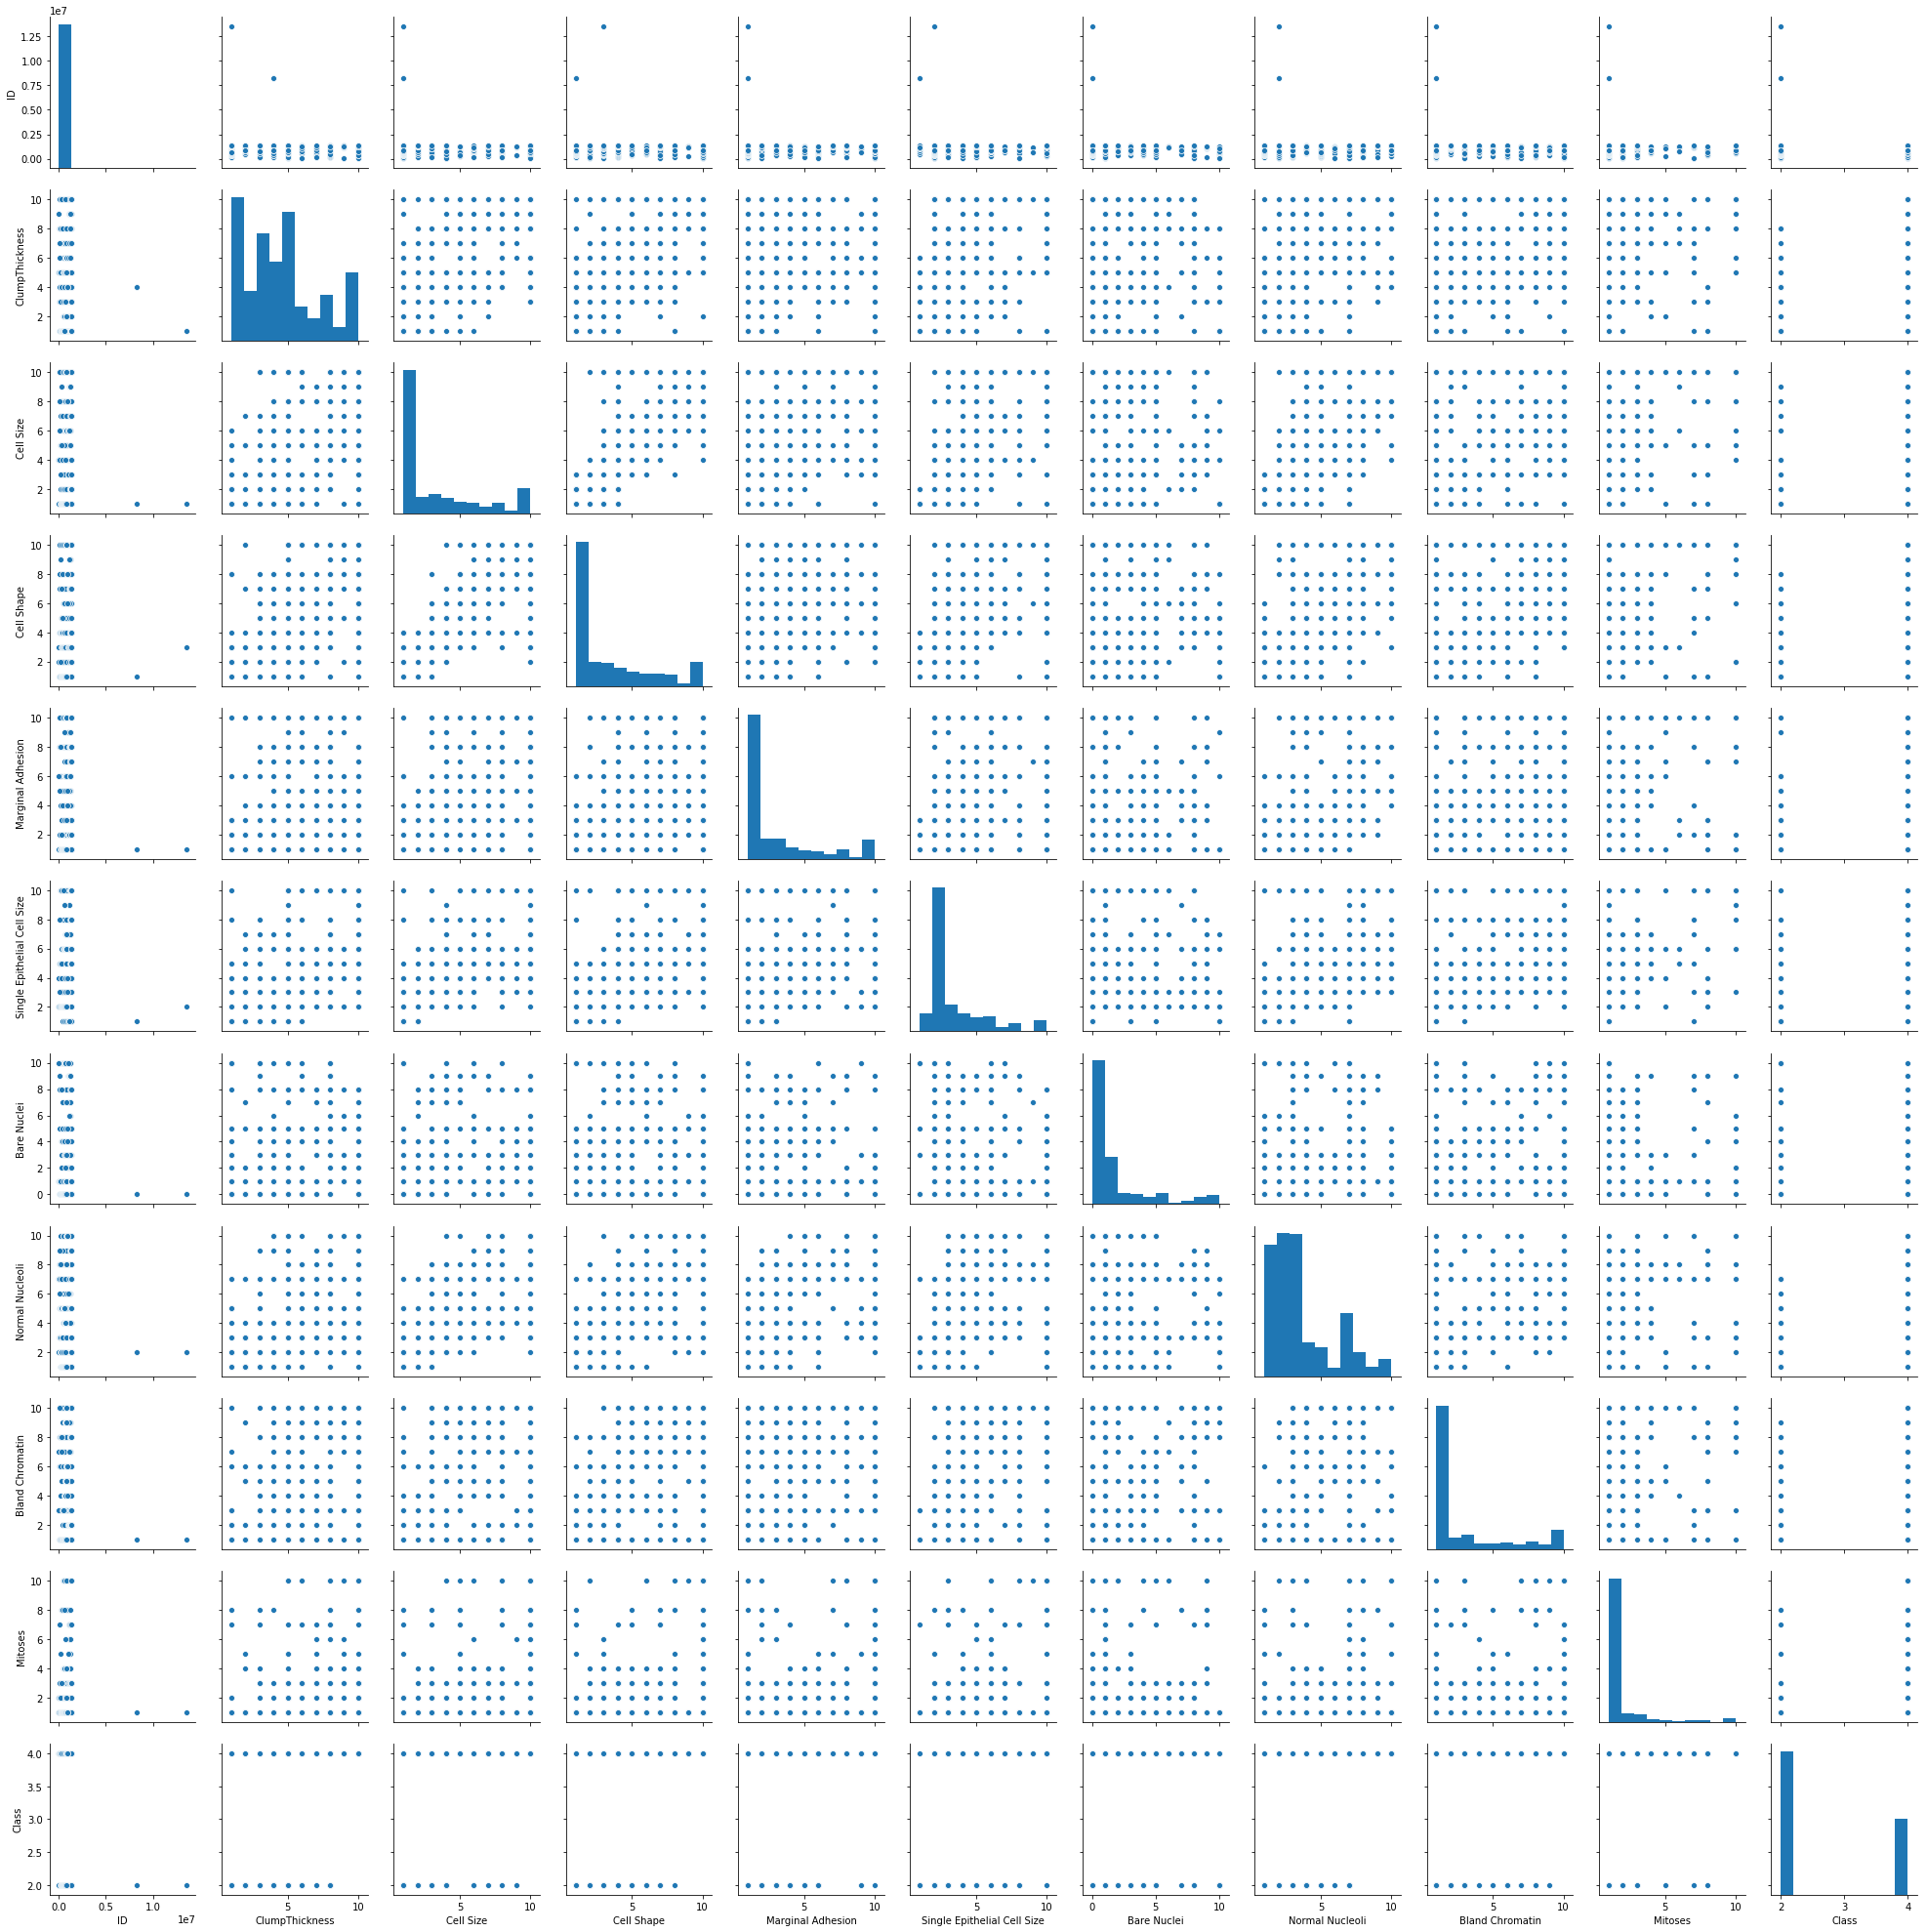

In [71]:
import seaborn as sns
sns.pairplot(pca)

## Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [72]:
X = pca.iloc[:,0:9].values
y = pca.iloc[:,10].values
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 10)
X_train_sd = StandardScaler().fit_transform(X_train)
X_test_sd = StandardScaler().fit_transform(X_test)

C:\Users\niranjan.nilekani\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\niranjan.nilekani\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\niranjan.nilekani\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\niranjan.nilekani\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarni

## Q6 Create a covariance matrix for identifying Principal components

In [76]:
cov_matrix = np.cov(X_train_sd.T)
print('Covariance Matrix \n%s', cov_matrix)



Covariance Matrix 
%s [[ 1.00179211 -0.06948571 -0.02826013 -0.02834902 -0.04787494 -0.02653323
  -0.07055505 -0.05155485 -0.05837665]
 [-0.06948571  1.00179211  0.6325921   0.65157657  0.47939997  0.51832491
   0.22590342  0.56032811  0.52091612]
 [-0.02826013  0.6325921   1.00179211  0.90907327  0.70565089  0.74024821
   0.30423497  0.76427089  0.70208161]
 [-0.02834902  0.65157657  0.90907327  1.00179211  0.66924716  0.71319109
   0.33113088  0.7412162   0.70079537]
 [-0.04787494  0.47939997  0.70565089  0.66924716  1.00179211  0.58760416
   0.21179869  0.64728879  0.59964334]
 [-0.02653323  0.51832491  0.74024821  0.71319109  0.58760416  1.00179211
   0.2722953   0.62467713  0.6244413 ]
 [-0.07055505  0.22590342  0.30423497  0.33113088  0.21179869  0.2722953
   1.00179211  0.29626977  0.30329054]
 [-0.05155485  0.56032811  0.76427089  0.7412162   0.64728879  0.62467713
   0.29626977  1.00179211  0.66512433]
 [-0.05837665  0.52091612  0.70208161  0.70079537  0.59964334  0.6244413
  

## Q7 Identify eigen values and eigen vector

In [75]:
e_vals, e_vecs = np.linalg.eig(cov_matrix)
e_vals, e_vecs = np.linalg.eig(cov_matrix)
print('Eigenvectors \n%s' %e_vecs)
print('\nEigenvalues \n%s' %e_vals)

Eigenvectors 
[[ 3.05623745e-02  9.44394637e-01  3.15566121e-01 -8.10574726e-04
  -5.01942990e-02  3.33301960e-02 -3.10493740e-02 -4.63390015e-02
   2.93315496e-02]
 [-3.23234785e-01 -2.05707683e-02 -1.12423874e-01 -3.10226290e-02
  -8.72757600e-01  1.82539803e-01 -2.41691954e-01 -1.66997261e-01
  -1.28410533e-02]
 [-4.11985124e-01  6.39346438e-02 -5.85321392e-02 -7.40234935e-01
   1.70199488e-02 -4.41784019e-01  2.36727174e-01  6.27072335e-02
  -1.39183687e-01]
 [-4.07841400e-01  5.03271343e-02 -1.87394554e-02  6.64896969e-01
  -6.64117365e-02 -5.61599193e-01  2.36450472e-01  7.02068913e-02
  -8.97297046e-02]
 [-3.49579121e-01  5.09217483e-02 -1.63062524e-01  5.13972116e-02
   4.04505383e-01  7.24877601e-02 -4.30822716e-01 -6.14761492e-01
  -3.36973839e-01]
 [-3.61395187e-01  5.85537115e-02 -3.72546581e-02  5.35628076e-02
   1.39489563e-01  3.84450072e-01 -1.95419294e-01  7.11295458e-01
  -3.87709908e-01]
 [-1.78170480e-01 -3.07734879e-01  9.24269394e-01 -2.34747900e-02
  -6.96401730e

##  Q8 Find variance and cumulative variance by each eigen vector

In [81]:
tot = sum(e_vals)
var_exp = [( i /tot ) * 100 for i in sorted(e_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 56.5428612   67.83428849  77.39355883  83.47574979  88.07813055
  92.3292413   96.00406577  99.01625637 100.        ]


## Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

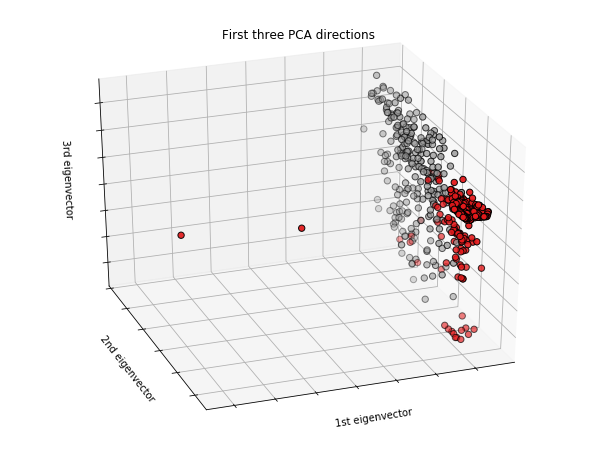

In [79]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(pca)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

## Q10 Find correlation between components and features

ValueError: shape mismatch: objects cannot be broadcast to a single shape

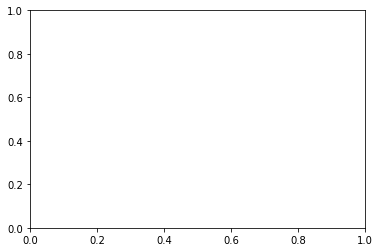

In [82]:
plt.figure(figsize=(6 , 4))
plt.bar(range(4), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(4), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

## SVM

## Q1 Read the input file 'Diabetes.csv' using Pandas and check it's column names(1 Marks)

In [55]:
svm = pd.read_csv("pima-indians-diabetes.csv")

In [56]:
# Eye ball the imported dataset
svm.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


### Check dimension of dataset

In [6]:
svm.shape

(768, 9)

## Q2 Check distribution of dependent variable, Outcome and plot it (1 Marks)

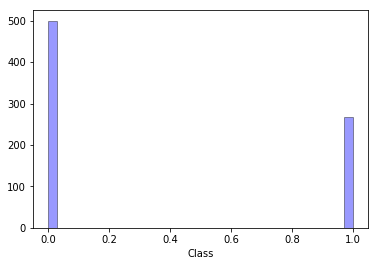

In [9]:
sns.distplot(svm['Class'], hist=True, kde=False, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})

### Out of  768 data points, 500 are labeled as 0 and 268 as 1.
### Outcome 0 means No diabetes, outcome 1 means diabetes

In [ ]:
# Check data types and info of dataset

## Q3 Check data distribution using summary statistics and provide your findings

In [10]:
svm.describe()
#no missing values in data and all are numerical data except class which is factor variable

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Q4 Do correlation analysis and bivariate viualization with Insights(1 Marks)

C:\Users\niranjan.nilekani\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\niranjan.nilekani\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\niranjan.nilekani\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\niranjan.nilekani\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83

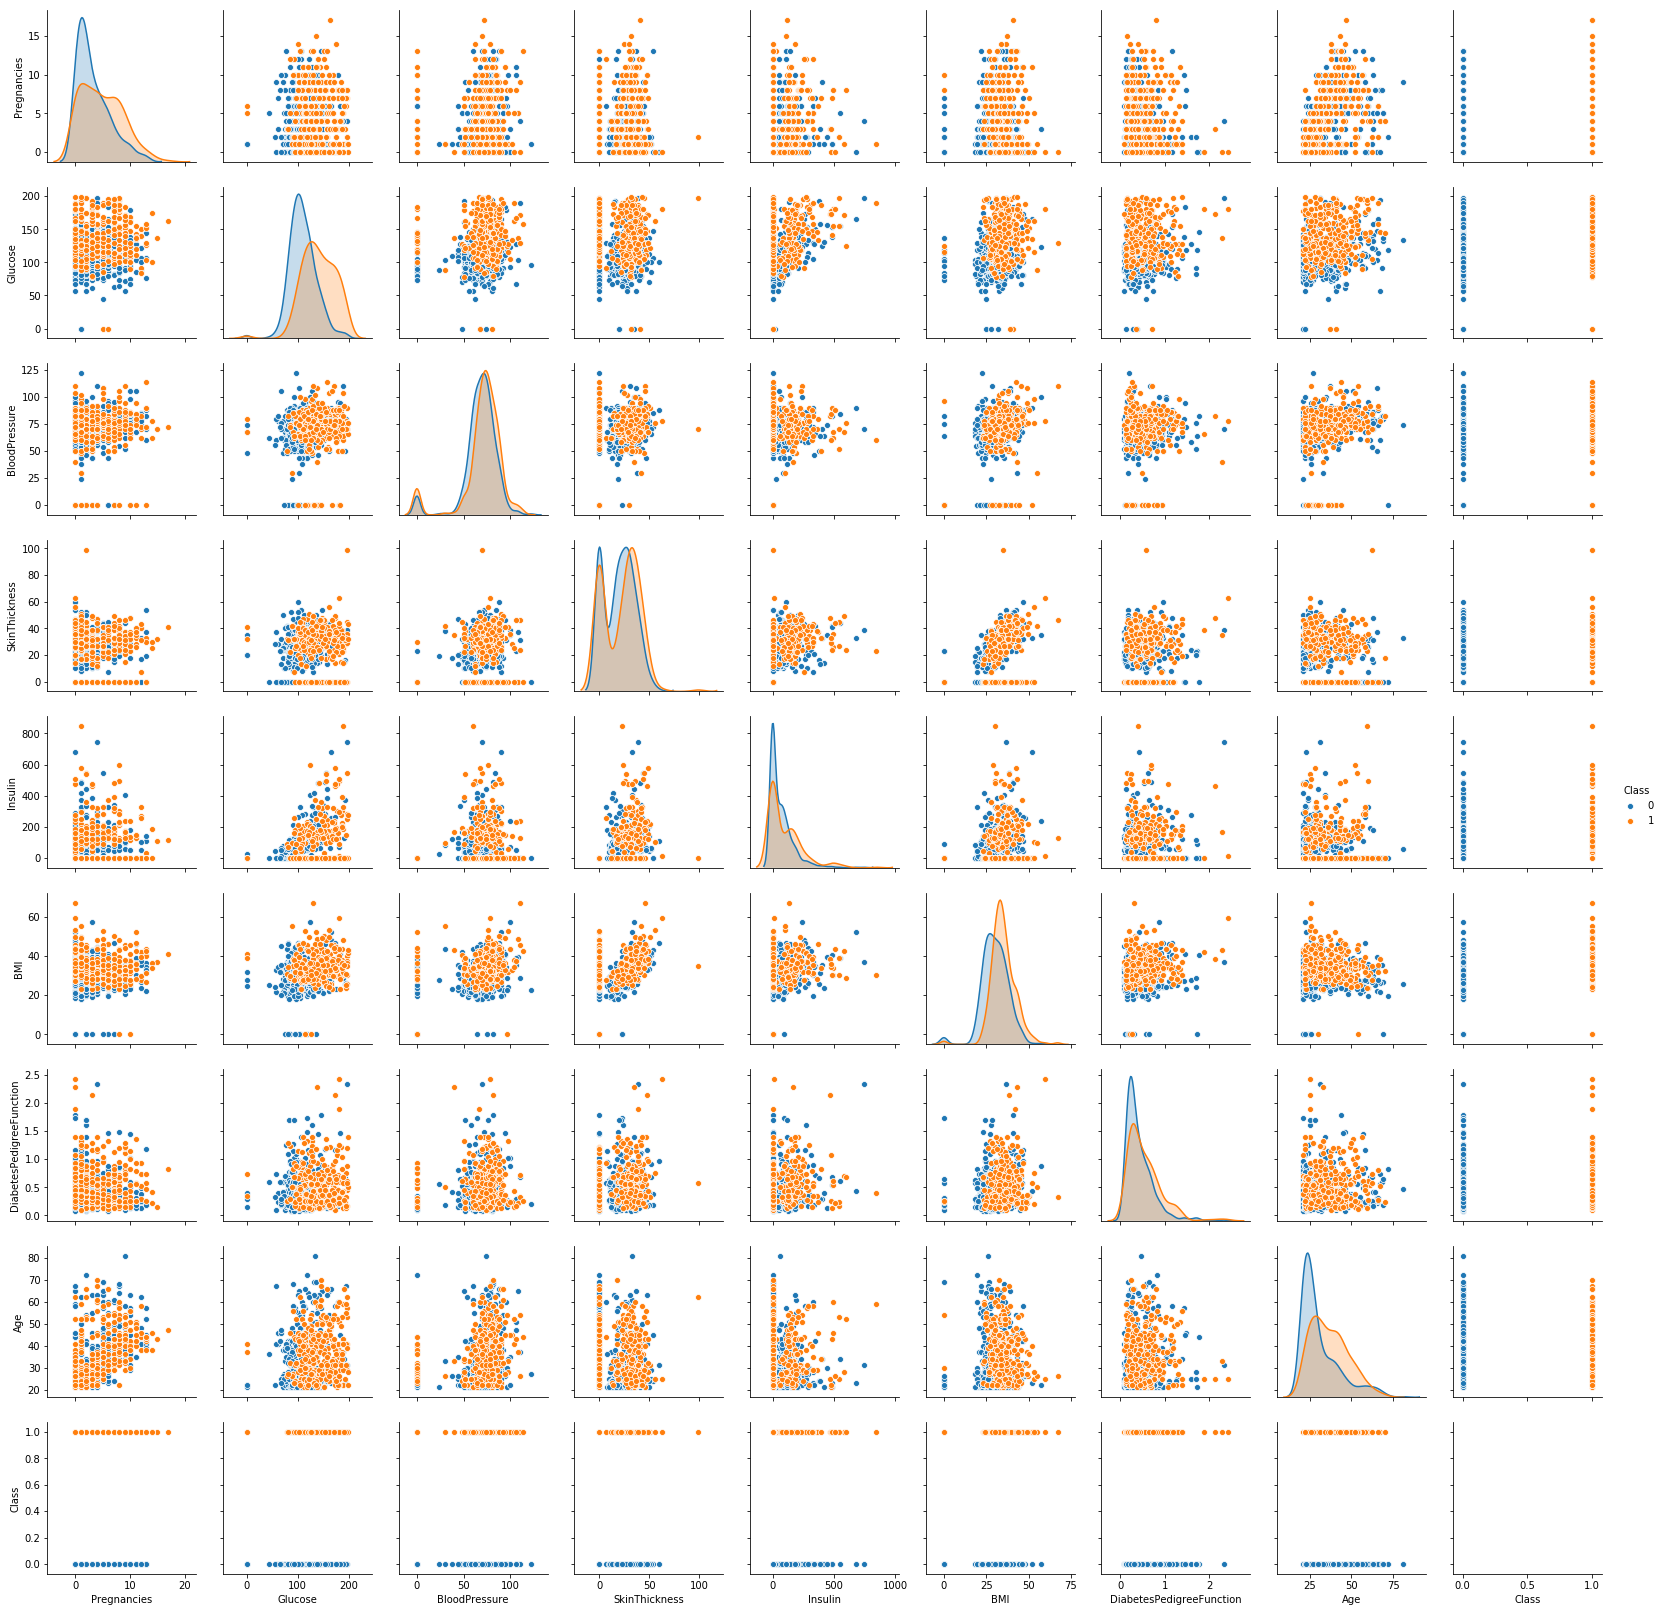

In [31]:
import seaborn as sns
sns.pairplot(svm, hue = "Class")

#### Do train and test split with stratify sampling on Outcome variable to maintain the distribution of dependent variable(1 Marks)

In [32]:
X = svm.drop("Class" , axis=1)

y = svm.pop("Class")
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y, 
                                                    test_size=0.25)

## Q5 Train Support Vector Machine Model(1 Marks)

In [34]:
# use from sklearn.svm import SVC
from sklearn import svm
clf = svm.SVC(C=0.5)
clf.fit(X_train , y_train)

SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [35]:
# your insights
clf.score(X_test, y_test)
# accuracy is 65% with 0.5 C and RBF kernel 

0.6510416666666666

## Q6 Scale the data points using MinMaxScaler ( 1 Marks)

In [57]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

model = SVC()
model.fit(X_train_scaled, y_train)

X_test_scaled = scaler.transform(X_test)
y_pred = model.predict(X_test_scaled)

## Q7 Fit SVM Model on Scale data and give your observation( 1 Marks)

In [58]:

scaler = preprocessing.MinMaxScaler()
scaled_df = scaler.fit_transform(df_svm)
X = scaled_df.drop("Class" , axis=1)

y = scaled_df.pop("Class")
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y, 
                                                    test_size=0.25)

from sklearn import svm
clf = svm.SVC(C=0.5)
clf.fit(X_train , y_train)

clf.score(X_test, y_test)

AttributeError: 'numpy.ndarray' object has no attribute 'drop'

#we can try increasing either C or gamma to fit a more complex model.

### Try improving the model accuracy using C=1000 (1 Marks)

### Here, increasing C allows us to improve the model, resulting in ??? accuracy.
### Let's try to explore different Kernel and C (Bonus for practice)

In [19]:
import multiprocessing 
from sklearn.model_selection import GridSearchCV

In [20]:
 param_grid = [    {        
     'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],        
     'C': [ 0.1, 0.2, 0.4, 0.5, 1.0, 1.5, 1.8, 2.0, 2.5, 3.0 ]    } ]

In [21]:
gs = GridSearchCV(estimator=SVC(), param_grid=param_grid,scoring='accuracy', cv=10, n_jobs=multiprocessing.cpu_count())

In [22]:
gs.fit(X_train_scaled, y_train) 

GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=4,
       param_grid=[{'kernel': ['linear', 'rbf', 'poly', 'sigmoid'], 'C': [0.1, 0.2, 0.4, 0.5, 1.0, 1.5, 1.8, 2.0, 2.5, 3.0]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [23]:
gs.best_estimator_

SVC(C=2.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [24]:
gs.best_score_ 

0.77777777777777779